-371.5151515151515+0.6647116324535318-0.6256109481915928
9.624633431085044+0.48680351906158315-0.45747800586510223


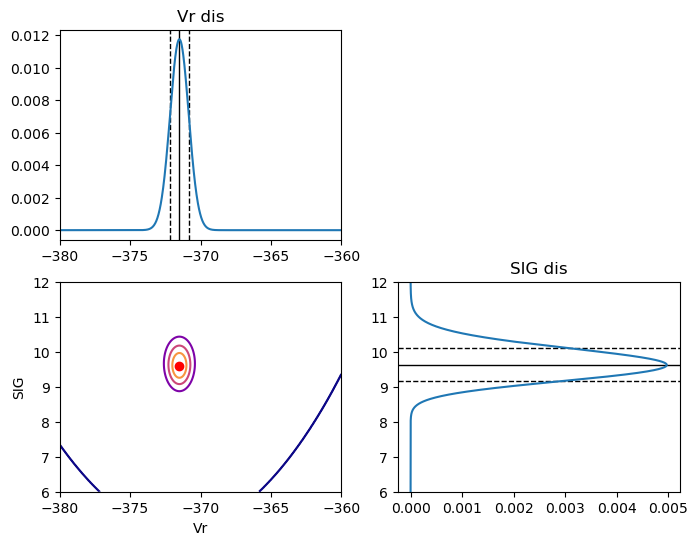

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec
data_path = '../Materials/data/'
data = pd.read_csv(data_path+'Cas3.csv')

import numpy as np
def lnG(x,x0,sig) :
    return -(x-x0)**2/(2*sig**2)-np.log(sig)

vr = np.array(data['vr'])
Vr = np.linspace(-380,-360,1024)
SIG = np.linspace(6,12,1024)
result = np.e**np.sum(lnG(vr[np.newaxis,np.newaxis,:],Vr[np.newaxis,:,np.newaxis],SIG[:,np.newaxis,np.newaxis]),axis=2)
result = result/np.max(result)




fig = plt.figure(figsize=(8, 6))
gs = GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])

ax2 = fig.add_subplot(gs[0, 0])
ax2.set_title("Vr dis")

ax1 = fig.add_subplot(gs[1, 0])
#ax1.set_title("Vr-SIG")

ax3 = fig.add_subplot(gs[1, 1])
ax3.set_title("SIG dis")

levels = 3
cmap = 'plasma'
contour = ax1.contour(Vr, SIG, result, levels=levels, cmap=cmap)
ax1.scatter(Vr[np.argmax(result) % len(result[0])], 
           SIG[np.argmax(result) // len(result)], 
           color='red', label='Max')
ax1.set_xlabel("Vr")
ax1.set_ylabel("SIG")
#ax1.colorbar(contour)  # 为第1个子图添加 colorbar
#plt.show()

def uncertainty(p,method=1) :
    if method==1 :
        m = int(np.sum(p*np.arange(len(p))))
        s = 0
        l = 0
        r = len(p)-1
        while s<0.16 :
            s += p[l]
            l += 1
        s = 0
        while s<0.16 :
            s += p[r]
            r -= 1
    if method==2 :
        m = np.argmax(p)
        t = p[m]*0.606
        l = m
        r = m
        while p[l]>t :
            l -= 1
        while p[r]>t :
            r += 1
    return l,m,r

Vrdis = np.sum(result,axis=0)
Vrdis = Vrdis/np.sum(Vrdis)
l, m, r = uncertainty(Vrdis)
print(f"{Vr[m]}+{Vr[r]-Vr[m]}-{Vr[m]-Vr[l]}")
ax2.axvline(Vr[m], color='k', linestyle='-', lw=1, zorder = -5447)
ax2.axvline(Vr[l], color='k', linestyle='--', lw=1, zorder = -5447)
ax2.axvline(Vr[r], color='k', linestyle='--', lw=1, zorder = -5447)
ax2.plot(Vr,Vrdis)
ax2.set_xlim(-380,-360)
#plt.show()
SIGdis = np.sum(result,axis=1)
SIGdis = SIGdis/np.sum(SIGdis)
l, m, r = uncertainty(SIGdis,method=2)
print(f"{SIG[m]}+{SIG[r]-SIG[m]}-{SIG[m]-SIG[l]}")
ax3.axhline(SIG[m], color='k', linestyle='-', lw=1, zorder = -5447)
ax3.axhline(SIG[l], color='k', linestyle='--', lw=1, zorder = -5447)
ax3.axhline(SIG[r], color='k', linestyle='--', lw=1, zorder = -5447)
ax3.plot(SIGdis,SIG)
ax3.set_ylim(6,12)
plt.show()

-371.4912434639289 0.669518442529449
-371.4897838236996+0.6668684128805216-0.6721609831723665
9.68188568941779 0.4775623879544881
9.658023349432042+0.5124469195091926-0.44121577852746774


Text(0.6, 12, '$σ = 9.7^{+0.5}_{-0.4} $')

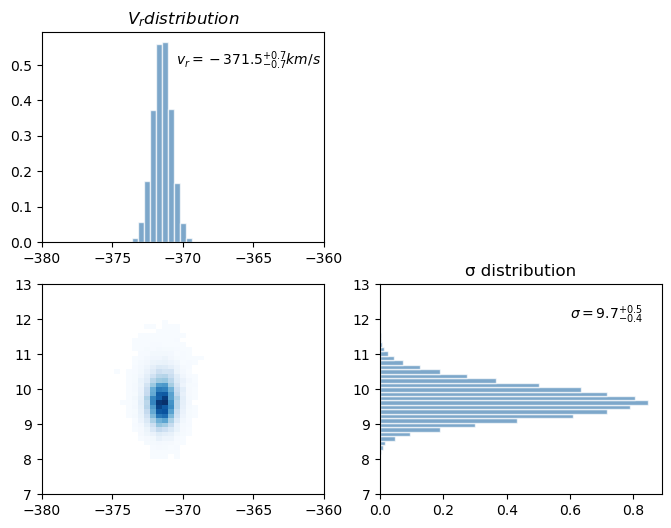

In [193]:
data = pd.read_csv('MCMC Cas3.csv')
vr = np.array(data['vr'][10000:])
sig = np.array(data['sigma'][10000:])
def uncertainty(p) :
    m = np.median(p)
    L = p[p<=m]
    R = p[p>m]
    l = np.sqrt(np.mean((L-m)**2))
    r = np.sqrt(np.mean((R-m)**2))
    return m,l,r

fig = plt.figure(figsize=(8, 6))
gs = GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])

ax2 = fig.add_subplot(gs[0, 0])
ax2.set_title("$V_r distribution$")

ax1 = fig.add_subplot(gs[1, 0])
#ax1.set_title("Vr-SIG")

ax3 = fig.add_subplot(gs[1, 1])
ax3.set_title("σ distribution")

#ax1.scatter(vr,sig,s=1,alpha=0.01)
h = ax1.hist2d(vr, sig, bins=[np.linspace(-380,-360,48),np.linspace(7,13,48)], cmap='Blues', cmin=1)  # cmin 忽略低计数
#plt.colorbar(h[3], ax=ax1, label='Counts')
ax1.set_xlim(-380,-360)
ax1.set_ylim(7,13)

ax2.set_xlim(-380,-360)
ax2.hist(vr, bins=np.linspace(-380,-360,48), density=True, alpha=0.7, color='steelblue', edgecolor='white')

ax3.set_ylim(7,13)
ax3.hist(sig, bins=np.linspace(7,13,48), density=True, alpha=0.7, color='steelblue', edgecolor='white', orientation='horizontal')

print(np.mean(vr),np.std(vr))
m,l,r = uncertainty(vr)
print(f"{m}+{r}-{l}")
ax2.text(-370.5, 0.5, f"$v_r = {m:.1f}^{{+{r:.1f}}}_{{-{l:.1f}}} km/s$")

print(np.mean(sig),np.std(sig))
m,l,r = uncertainty(sig)
print(f"{m}+{r}-{l}")
ax3.text(0.6, 12, f"$σ = {m:.1f}^{{+{r:.1f}}}_{{-{l:.1f}}} $")